In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train_loan.csv')

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
#Missing Value Handling

In [7]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [8]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

In [9]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])

In [12]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [13]:
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])

In [14]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [15]:
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])


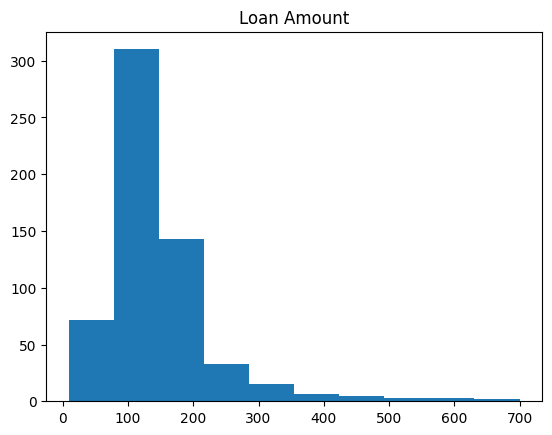

In [16]:
plt.hist(data['LoanAmount'])
plt.title('Loan Amount')
plt.show()

In [17]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())

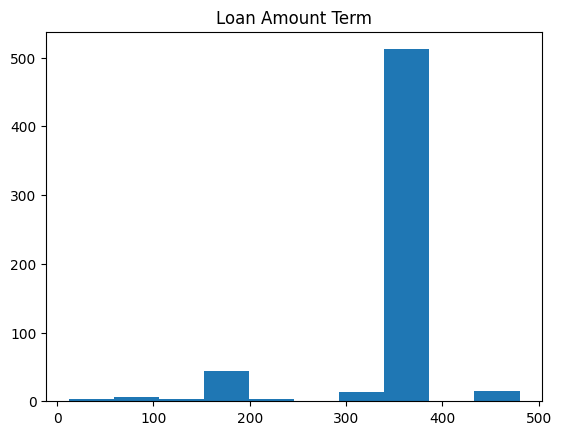

In [18]:
plt.hist(data['Loan_Amount_Term'])
plt.title('Loan Amount Term')
plt.show()

In [19]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())

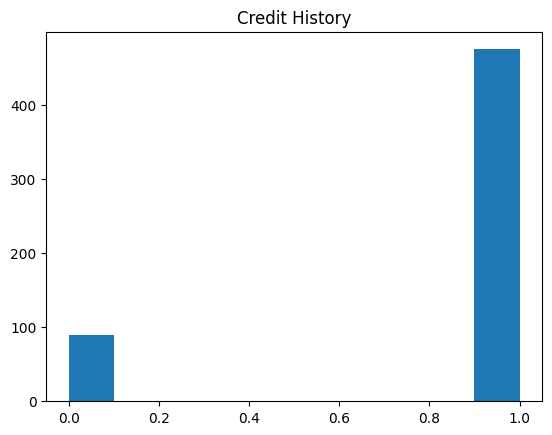

In [20]:
plt.hist(data['Credit_History'])
plt.title('Credit History')
plt.show()

In [21]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [22]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
#detecting and removing outlieres


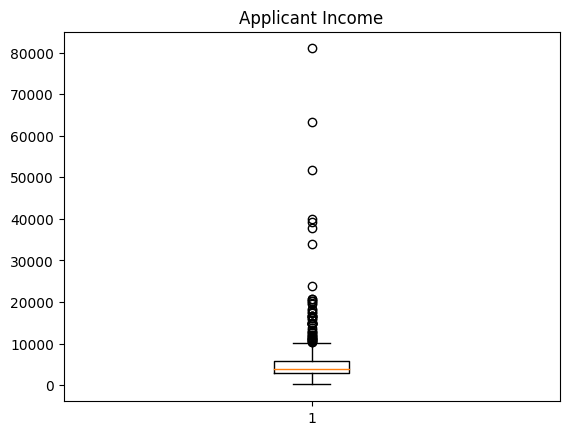

In [24]:
plt.boxplot(data['ApplicantIncome'])
plt.title('Applicant Income')
plt.show()

In [25]:
Q1 = data['ApplicantIncome'].quantile(0.25)
Q2 = data['ApplicantIncome'].quantile(0.5)
Q3 = data['ApplicantIncome'].quantile(0.75)

In [26]:
IQR = Q3 - Q1

In [27]:
low = Q1 - (1.5 * IQR)
up = Q3 + (1.5 * IQR)

In [28]:
print(low,up)

-1498.75 10171.25


In [29]:
data[(data['ApplicantIncome']<low) | (data['ApplicantIncome']>up)].index

Int64Index([  9,  34,  54,  67, 102, 106, 115, 119, 126, 128, 130, 138, 144,
            146, 155, 171, 183, 185, 191, 199, 254, 258, 271, 278, 284, 308,
            324, 333, 369, 370, 409, 424, 432, 438, 443, 467, 475, 478, 483,
            487, 493, 506, 509, 525, 533, 534, 561, 572, 594, 604],
           dtype='int64')

In [30]:
print(data['ApplicantIncome'].skew())

6.539513113994625


In [31]:
#Flooring and capping for treating ouliers

print(data['ApplicantIncome'].quantile(0.10))
print(data['ApplicantIncome'].quantile(0.90))

2216.1
9459.900000000007


In [32]:
data["ApplicantIncome"] = np.where(data["ApplicantIncome"] <2216.1, 2216.1,data['ApplicantIncome'])
data["ApplicantIncome"] = np.where(data["ApplicantIncome"] >9459.9, 9459.9,data['ApplicantIncome'])
print(data['ApplicantIncome'].skew())

1.0177280847006949


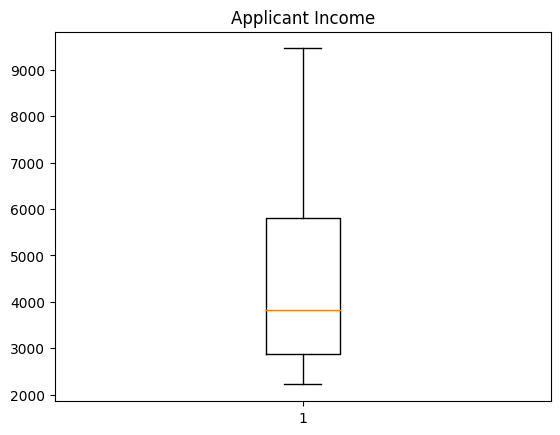

In [33]:
plt.boxplot(data['ApplicantIncome'])
plt.title('Applicant Income')
plt.show()

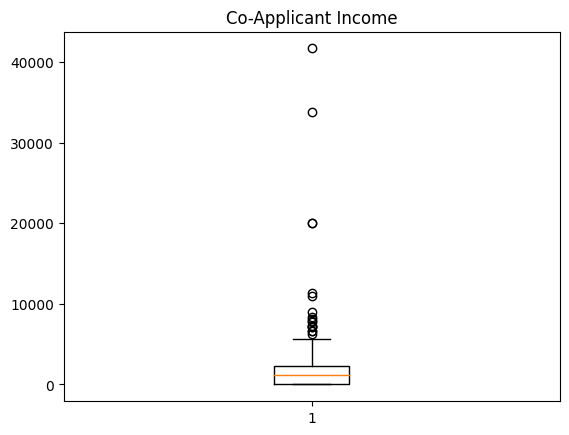

In [34]:
plt.boxplot(data['CoapplicantIncome'])
plt.title('Co-Applicant Income')
plt.show()

In [35]:
Q1a = data['CoapplicantIncome'].quantile(0.25)
Q2a = data['CoapplicantIncome'].quantile(0.5)
Q3a = data['CoapplicantIncome'].quantile(0.75)

In [36]:
IQRa = Q3a - Q1a
low_1 = Q1a - (1.5 * IQRa)
up_1 = Q3a + (1.5 * IQRa)

In [37]:
print(low_1,up_1)

-3445.875 5743.125


In [38]:
data[(data['CoapplicantIncome']<low_1) | (data['CoapplicantIncome']>up_1)].index

Int64Index([  9,  12,  38, 122, 135, 177, 180, 253, 349, 372, 402, 417, 444,
            506, 513, 523, 581, 600],
           dtype='int64')

In [39]:
print(data['CoapplicantIncome'].skew())

7.491531216657306


In [40]:
print(data['CoapplicantIncome'].quantile(0.10))
print(data['CoapplicantIncome'].quantile(0.90))

0.0
3782.200000000002


In [41]:
data['CoapplicantIncome'] = np.where(data['CoapplicantIncome'] <0.0, 0.0,data['CoapplicantIncome'])
data['CoapplicantIncome'] = np.where(data['CoapplicantIncome'] >3782.2, 3782.2,data['CoapplicantIncome'])
print(data['CoapplicantIncome'].skew())

0.5184989987479339


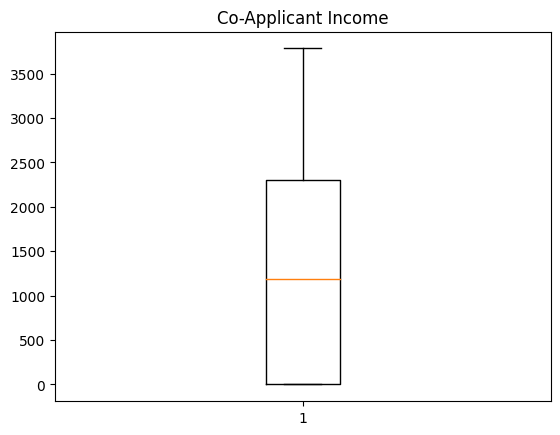

In [42]:
plt.boxplot(data['CoapplicantIncome'])
plt.title('Co-Applicant Income')
plt.show()

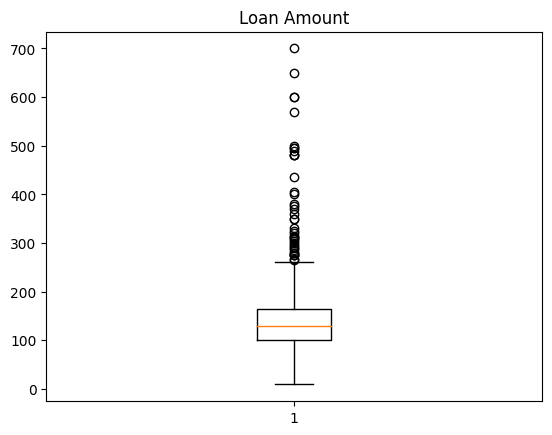

In [43]:
plt.boxplot(data['LoanAmount'])
plt.title('Loan Amount')
plt.show()

In [44]:
Q1b = data['LoanAmount'].quantile(0.25)
Q2b = data['LoanAmount'].quantile(0.5)
Q3b = data['LoanAmount'].quantile(0.75)

In [45]:
IQRb = Q3b - Q1b
low_2 = Q1b - (1.5 * IQRb)
up_2 = Q3b + (1.5 * IQRb)

In [46]:
print(low_2,up_2)

3.5 261.5


In [47]:
data[(data['LoanAmount']<low_2) | (data['LoanAmount']>up_2)].index

Int64Index([  5,   9,  21,  34,  54,  67,  83, 126, 130, 135, 155, 161, 171,
            177, 233, 253, 258, 260, 278, 308, 324, 325, 333, 351, 369, 372,
            381, 391, 409, 432, 487, 506, 514, 523, 525, 536, 561, 572, 592,
            600, 604],
           dtype='int64')

In [48]:
print(data['LoanAmount'].skew())

2.726601144105299


In [49]:
print(data['LoanAmount'].quantile(0.10))
print(data['LoanAmount'].quantile(0.90))

72.30000000000001
229.4000000000001


In [50]:
data['LoanAmount'] = np.where(data['LoanAmount'] < 72.3,72.3,data['LoanAmount'])
data['LoanAmount'] = np.where(data['LoanAmount'] > 229.4,229.4,data['LoanAmount'])
print(data['LoanAmount'].skew())

0.5635066758184382


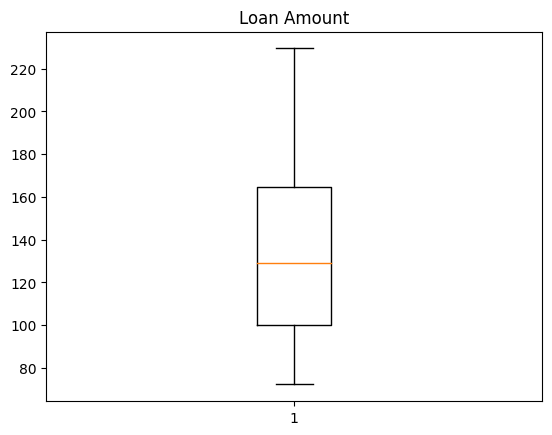

In [51]:
plt.boxplot(data['LoanAmount'])
plt.title('Loan Amount')
plt.show()

In [52]:
#encoding

In [53]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [55]:
data['Loan_ID'] = le.fit_transform(data['Loan_ID'])
data['Gender'] = le.fit_transform(data['Gender'])
data['Married'] = le.fit_transform(data['Married'])
data['Education'] = le.fit_transform(data['Education'])
data['Self_Employed'] = le.fit_transform(data['Self_Employed'])
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])
data['Property_Area'] = le.fit_transform(data['Property_Area'])


In [56]:
data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [57]:
data['Dependents'] = data['Dependents'].str.replace('+',' ')

<ipython-input-57-8ff0d85e0df4>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Dependents'] = data['Dependents'].str.replace('+',' ')


In [58]:
data['Dependents'] = data['Dependents'].astype('int32')

In [59]:
data.dtypes

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int32
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [60]:
# scaling

In [61]:
#Required columns for scaling

In [62]:
x = data.drop(['Loan_Status','Loan_ID'],axis = 1)
y = data['Loan_Status']

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
mn = MinMaxScaler()

In [65]:
x.loc[:,['LoanAmount','Loan_Amount_Term','Credit_History','ApplicantIncome','CoapplicantIncome']] = mn.fit_transform(x[['LoanAmount','Loan_Amount_Term','Credit_History','ApplicantIncome','CoapplicantIncome']])

In [66]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,0.501519,0.000000,0.471752,0.74359,1.0,2
1,1,1,1,0,0,0.326748,0.398710,0.354551,0.74359,1.0,0
2,1,1,0,0,1,0.108217,0.000000,0.000000,0.74359,1.0,2
3,1,1,0,1,0,0.050650,0.623447,0.303628,0.74359,1.0,2
4,1,0,0,0,0,0.522364,0.000000,0.437301,0.74359,1.0,2


In [67]:
#train test split

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state= 42)

In [69]:
#ensemble learning techniques

In [70]:
#decision tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [72]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [73]:
y_pred = clf.predict(x_test)

In [74]:
from sklearn import metrics

In [75]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.6666666666666666


In [76]:
#bagging clasifier

In [77]:
from sklearn.ensemble import BaggingClassifier

In [78]:
tree = DecisionTreeClassifier()

In [79]:
bagging_clf = BaggingClassifier(base_estimator= tree,n_estimators = 100,random_state =42)

In [80]:
bagging_clf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [81]:
y_pred = bagging_clf.predict(x_test)

In [82]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7560975609756098


In [83]:
#bagging clasifier using svc

In [84]:
from sklearn.svm import SVC

In [85]:
bagging_clf2 = BaggingClassifier(base_estimator = SVC(),n_estimators = 85,random_state = 42)

In [86]:
bagging_clf2.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=SVC(), n_estimators=85, random_state=42)

In [90]:
y_pred_svm = bagging_clf2.predict(x_test)
print('Accuracy:',metrics.accuracy_score(y_test,y_pred_svm))

Accuracy: 0.7886178861788617


In [91]:
#boosting

In [92]:
#AdaBoostClassifier

In [93]:
from sklearn.ensemble import AdaBoostClassifier

In [94]:
ada_boost_clf = AdaBoostClassifier(n_estimators = 100)

In [95]:
ada_boost_clf.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [96]:

y_pred = ada_boost_clf.predict(x_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred))

Accuracy :  0.7723577235772358


In [97]:
#GradientBoostingClassifier

In [98]:
from sklearn.ensemble import GradientBoostingClassifier

In [99]:
grad_boost_clf = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=42)
grad_boost_clf.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [102]:
y_pred_grad = grad_boost_clf.predict(x_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred_grad))

Accuracy :  0.7560975609756098


In [103]:
#xgboost

In [104]:
import xgboost as xgb

xg_boost_clf = xgb.XGBClassifier()
xg_boost_clf.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [106]:
y_pred_xg = xg_boost_clf.predict(x_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred_xg))

Accuracy :  0.7560975609756098


In [107]:
#random forest classifier

In [108]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(n_estimators=100)
clf1.fit(x_train,y_train)

RandomForestClassifier()

In [109]:
y_pred_random = clf1.predict(x_test)

In [111]:
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred_random))

Accuracy :  0.7886178861788617
